***
***

# Introduction to Neural Network


***
***


<img src= 'img/neuralnetwork/playground.png' width= "700px">

http://playground.tensorflow.org/

- Deep Learning http://www.deeplearningbook.org
    - An MIT Press book by Ian Goodfellow, Yoshua Bengio and Aaron Courville

- Neural Networks and Deep Learning http://neuralnetworksanddeeplearning.com/index.html

    - A free online book explaining the core ideas behind artificial neural networks and deep learning. [Code](https://github.com/mnielsen/neural-networks-and-deep-learning). By [Michael Nielsen](http://michaelnielsen.org/) / Dec 2017

## House Price

Let’s start with a simple example. 
- Say you’re helping a friend who wants to buy a house.

- She was quoted $400,000 for a 2000 sq ft house (185 meters). 

Is this a good price or not?

So you ask your friends who have bought houses in that same neighborhoods, and you end up with three data points:



| Area (sq ft) (x)  |  Price (y)   |  
| -------------|:-------------:|
|2,104|399,900|
|1,600|329,900|
|2,400|369,000|


$$y = f(X) = W X$$

- Calculating the prediction is simple multiplication.
- But before that, we need to think about the weight we’ll be multiplying by. 
- “training” a neural network just means finding the weights we use to calculate the prediction.


A simple predictive model (“regression model”)
- takes an input, 
- does a calculation, 
- and gives an output 



<img src= 'img/neuralnetwork/data_points_graph_animated.gif' width= "700px">

Model Evaluation
- If we apply our model to the three data points we have, how good of a job would it do?


<img src= 'img/neuralnetwork/data_points_error_animated.gif' width= "700px">


<img src= 'img/neuralnetwork/model_evaluation.png' width= "500px">

**Loss Function (also, cost function)**

- For each point, the error is measured by the difference between the **actual value** and the **predicted value**, raised to the power of 2. 
- This is called **Mean Square Error**. 


<img src= 'img/neuralnetwork/lines_and_errors_animated.gif' width= "700px">

- We can't improve much on the model by varying the weight any more. 
- But if we add a bias (intercept) we can find values that improve the model.

<img src= 'img/neuralnetwork/NNs_bias_2.png' width= "500px">

$$y = 0.1 X + 150$$

**Gradient Descent**

- Automatically get the correct weight and bias values 
- minimize the loss function.

<img src= 'img/neuralnetwork/gd.png' width= "700px">




<img src= 'img/neuralnetwork/NNs_2_variables.png' width= "500px">




<img src= 'img/neuralnetwork/softmax-regression-scalargraph.png' width= "500px">



## softmax

The softmax function, also known as softargmax or normalized exponential function, is a function that takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities. 

$$softmax = \frac{e^x}{\sum e^x}$$


In [128]:
def softmax(s):
    return np.exp(s) / np.sum(np.exp(s), axis=0)

softmax([1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0])

array([0.02364054, 0.06426166, 0.1746813 , 0.474833  , 0.02364054,
       0.06426166, 0.1746813 ])


That is, prior to applying softmax, some vector components could be negative, or greater than one; and might not sum to 1; but after applying softmax, each component will be in the interval (0,1), and the components will add up to 1, so that they can be interpreted as probabilities. 

Furthermore, the larger input components will correspond to larger probabilities. 

Softmax is often used in neural networks, to map the non-normalized output of a network to a probability distribution over predicted output classes.

## Activation Function


In [12]:
import numpy as np
def sigmoid(x):
    return 1/(1 + np.exp(-x))

sigmoid(0.5)

0.6224593312018546

In [13]:
# Naive scalar relu implementation. 
# In the real world, most calculations are done on vectors
def relu(x):
    if x < 0:
        return 0
    else:
        return x

relu(0.5)

0.5

# WHAT IS PYTORCH?

It’s a Python-based scientific computing package targeted at two sets of audiences:

- A replacement for NumPy to use the power of GPUs
- a deep learning research platform that provides maximum flexibility and speed

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch.autograd import Variable
import numpy as np

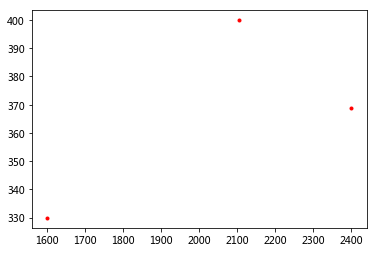

In [2]:
x_train = np.array([[2104],[1600],[2400]], dtype=np.float32)
y_train = np.array([[399.900], [329.900], [369.000]], dtype=np.float32)

# x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
#                     [9.779], [6.182], [7.59], [2.167], [7.042],
#                     [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

# y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
#                     [3.366], [2.596], [2.53], [1.221], [2.827],
#                     [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

plt.plot(x_train, y_train, 'r.')
plt.show()

In [3]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

`nn.Linear`

Applies a linear transformation to the incoming data: $y = xA^T + b$

In [4]:
# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression()

In [5]:
# Define Loss and Optimizatioin function
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-9)#1e-4)

In [6]:
num_epochs = 1000
for epoch in range(num_epochs):
    inputs = Variable(x_train)
    target = Variable(y_train)

    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data.item()))


Epoch[50/1000], loss: 346492.500000
Epoch[100/1000], loss: 148748.437500
Epoch[150/1000], loss: 64518.070312
Epoch[200/1000], loss: 28639.699219
Epoch[250/1000], loss: 13357.108398
Epoch[300/1000], loss: 6847.381348
Epoch[350/1000], loss: 4074.527344
Epoch[400/1000], loss: 2893.413086
Epoch[450/1000], loss: 2390.306152
Epoch[500/1000], loss: 2176.009766
Epoch[550/1000], loss: 2084.726562
Epoch[600/1000], loss: 2045.842651
Epoch[650/1000], loss: 2029.282349
Epoch[700/1000], loss: 2022.227905
Epoch[750/1000], loss: 2019.222412
Epoch[800/1000], loss: 2017.942139
Epoch[850/1000], loss: 2017.397949
Epoch[900/1000], loss: 2017.164795
Epoch[950/1000], loss: 2017.066162
Epoch[1000/1000], loss: 2017.023682


$$
\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
        l_n = \left( x_n - y_n \right)^2,
$$
    where :`N` is the batch size. 

In [109]:
model.eval()

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

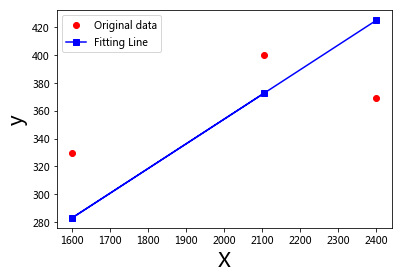

In [7]:
predict = model(Variable(x_train))
predict = predict.data.numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, 'b-s', label='Fitting Line')
plt.xlabel('X', fontsize= 20)
plt.ylabel('y', fontsize= 20)
plt.legend()
plt.show()

使用pytorch建立卷积神经网络并处理MNIST数据。
https://computational-communication.com/pytorch-mnist/